План занятия:

1. Теория:
    - Обучение по батчам;
    - Нормализация входных данных;
    - Батч-нормализация (batchnorm);
2. Практика:
    - Классификация изображений цифр MNIST с помощью нейросети на PyTorch.

## Теория

### Обучение по батчам

Мы уже знаем, что нейросети обучаются с помощью алгоритма обратного распространения ошибки (backpropagation), который основан на градиентном спуске. Его суть в том, чтобы последовательно изменять значения параметров нейрости, используя подсчет частных производных лосса $L$ по параметрам сети $\frac{\partial L}{\partial w_i}$.

**Вспомним, как выглядит идея алгоритма обучения нейросети:**

Пусть у нас есть нейросеть $F$, датасет из $n$ элементов $\{X_i, Y_i\}_{i=0}^n$ и лосс-функция $loss$. Тогда наша задача — найти такие значения весов нейросети, чтобы значение лосс-функции $loss$ в среднем для всех элементов датасета было маленьким:

$$L = \frac{∑^{n}_{i=1} loss(y_i, \widehat{y}_i)}{n} \to min$$

Здесь $y_i$ — правильный ответ на i-й элементы датасета, $\widehat{y}_i$ — ответ нейросети на $i$-й элемент датасета.

Алгоритм градиентного спуска помогает находить оптимальные веса с помощью следующих идей:
- знак частной производной $\frac{\partial L}{\partial w_i}$ показывает, в какую сторону нужно сдвинуть вес $w_i$, чтобы значение лосса $L$ стало меньше;
- модуль частной производной $\frac{\partial L}{\partial w_i}$ тем больше, чем дальше значение $w_i$ от оптимального;




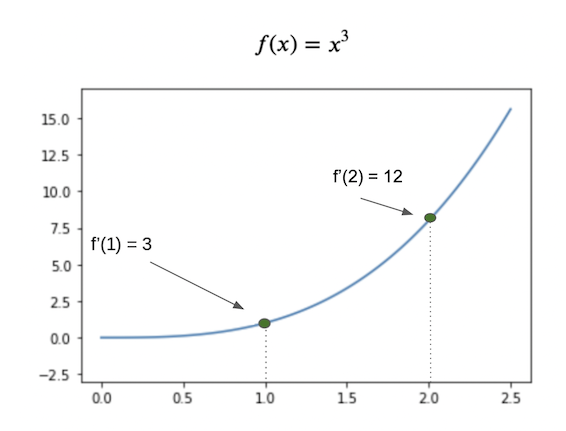

**Алгоритм градиентной оптимизации** для нейросети выглядит следующим образом:

1. Инициализируем все веса сети $W_i$ и $b_i$ случайными значениями. Выбираем значение шага градиентного спуска $\alpha$
2. Пока не будет выполнен критерий остановки, делаем следующее:
    - вычисляем значение $L$ c текущими значениями параметров $W_i$ и $b_i$;
    - вычисляем значения частных производных $\frac{\partial L}{\partial W_i}$, $\frac{\partial L}{\partial b_i}$;
    - обновляем значения параметров сети:
    $$W_i = W_i - \alpha \frac{\partial L}{\partial W_i}, \ \ b_i = b_i - \alpha \frac{\partial L}{\partial b_i}$$

Критерии остановки могут быть разные. Самый логичный и распространенный такой: останавливаемся, когда изменения лосса от итерации к итерации (или от эпохи к эпохе) стали невелики по модулю. Кроме этого, смотрим за переобучением: если началось переобучение, останавливаем алгоритм.

Теперь представим, что у нас большой датасет. Например, 1.000.000 элементов. Для такого датасета каждая итерация описанного выше алгоритма будет работать очень долго, ведь на каждой итерации придется вычислять значение выхода нейросети и лосса $L$ по всем элементам данных!
Кроме этого, может возникнуть еще и вторая проблема: датасет большого размера может не влезть в память GPU. Тогда мы в принципе не сможем сделать шаг алгоритма.

Решение такое: давайте на каждом шаге будем вычислять значение лосса $L$ и частных производных по части элементов датасета, а не по всем сразу. Например, по 100 элементам. Тогда алгоритм будет выглядеть так:

**Алгоритм градиентной оптимизации** для нейросети выглядит следующим образом:

1. Инициализируем все веса сети $W_i$ и $b_i$ случайными значениями. Выбираем значение шага градиентного спуска $\alpha$
2. Пока не будет выполнен критерий остановки, делаем следующее:
    - Разбиваем данные на **батчи** по $k$ элементов в каждом. Для каждого бача делаем следующее:
        - вычисляем значение $L^j$ c текущими значениями параметров $W_i$ и $b_i$ по элементам текущего $j$-го батча;
        - вычисляем значения частных производных $\frac{\partial L^j}{\partial W_i}$, $\frac{\partial L^j}{\partial b_i}$;
        - Обновляем значения параметров сети:
        $$W_i = W_i - \alpha \frac{\partial L^j}{\partial W_i}, \ \ b_i = b_i - \alpha \frac{\partial L^j}{\partial b_i}$$

Такой алгоритм называется **градиентным спуском по мини-батчам** (mini-batch gradient descent) или **стохастическим градиентным спуском** (stochastic gradient descent, SGD).

Каждая итерация такого алгоритма работает намного быстрее, чем каждая итерация обычного градиентного спуска, где мы каждый раз вычисляли значение $L$ по всем элементам датасета. Но общее количество итераций, которое требуется стохастическому градиентному спуску, получается больше.

Чтобы понять, что имеется в виду, рассмотрим крайний случай, когда размер батча равен единице. То есть, когда на каждой итерации градиентного спуска мы вычисляем значение выражения $L$ и частные производные только на основе одного элемента датасета. Это значит, что на каждом шаге алгоритма мы будем сдвигать веса сети так, чтобы сеть начинала выдавать лучшие ответы именно на текущий элемент $y_i$. Но это направление изменения весов не обязательно точно совпадает с тем, которое ведет к улучшению результатов сети на всех элементах датасета.

Получается, стохастический градиентный спуск на каждом шаге будет двигать значения параметров в направлении, чуть отклоняющемся от идеального.


Проиллюстрировать это можно так:

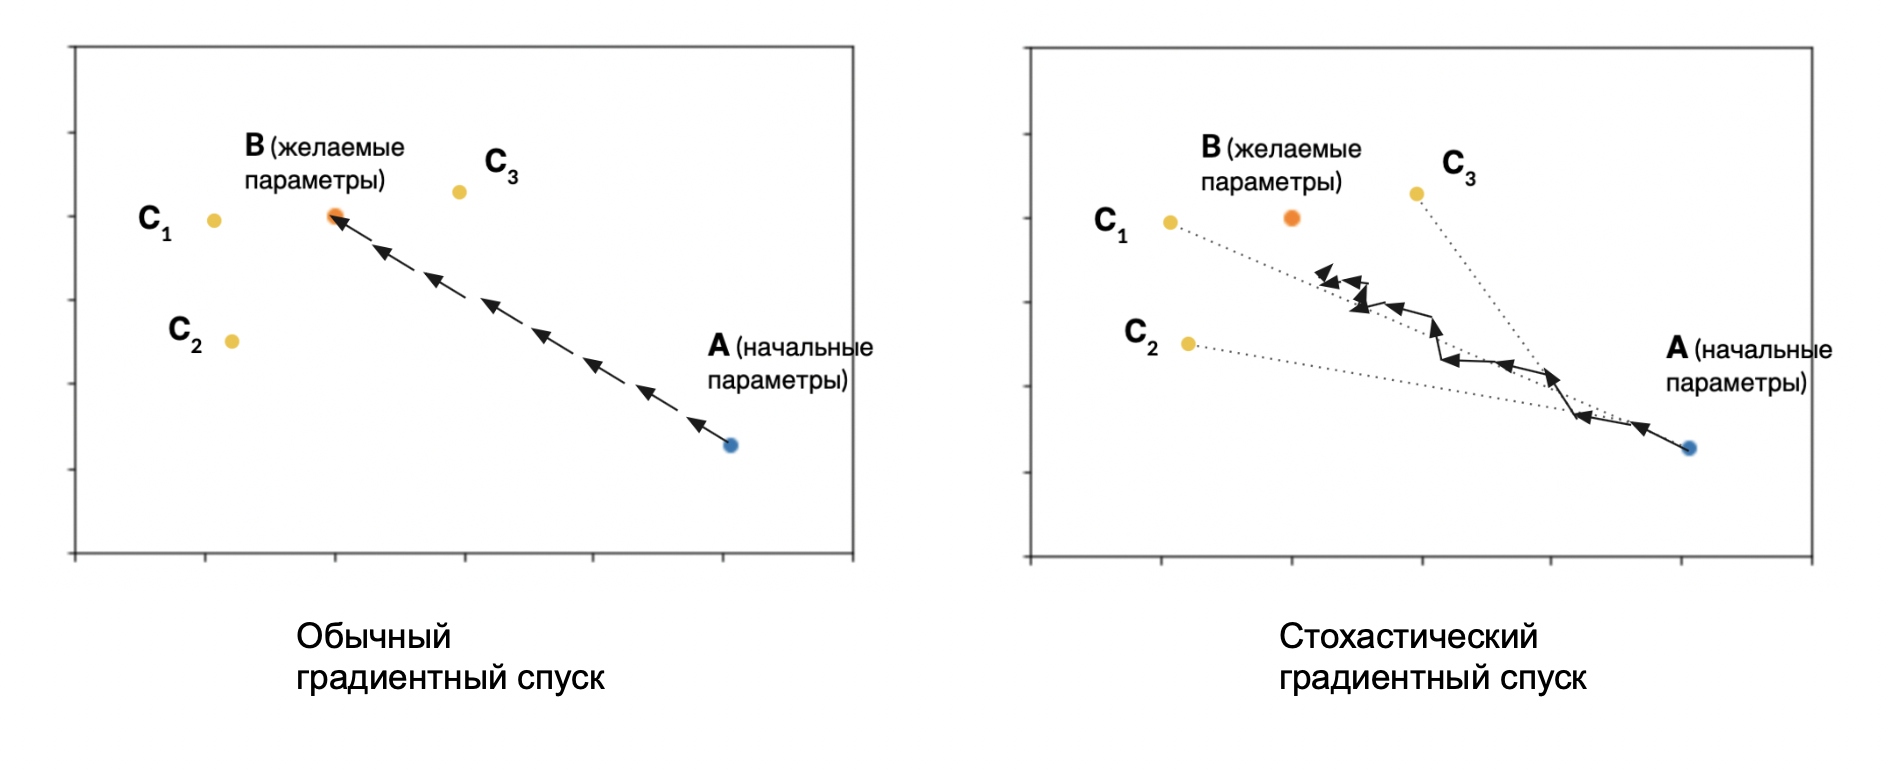

Здесь $B$ — вектор тех значений параметров, при которых среднее значение лосса на элементах датасета минимально. То есть, это те значения параметров, к которым мы хотим прийти в результате обучения сети.
$С_i$ — векторы значений параметров сети, при которых значение лосса на $i$-ом элементе датасета минимально.


В случае градиентного спуска по мини-батчам картинка будет такой:

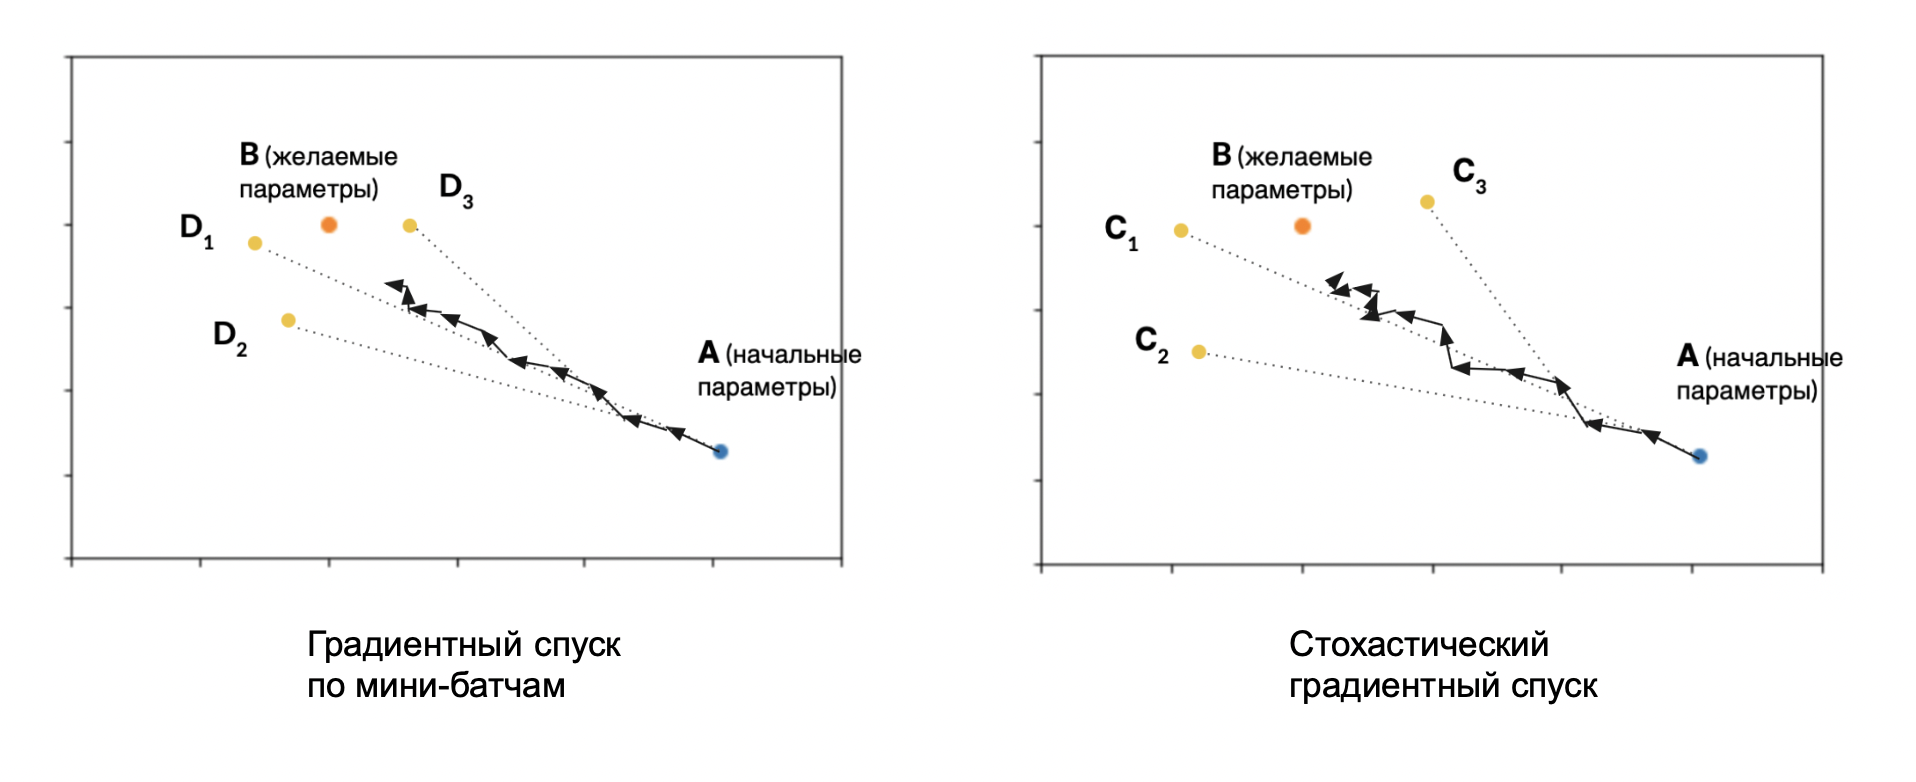

Здесь $D_i$ — векторы значений параметров сети, при которых значение лосса на $i$-ом батче минимально. $D_i$ в среднем ближе к $B$, чем $C_i$. Поэтому для градиентного спуска по мини-батчам понадобится меньше итераций, чем когда размер батча равен 1.

Получается, мы имеем трейд-офф между скоростью выполнения одной итерации алгоритма и количеством нужных итераций. На практике обычно размер батча берут наибольшим, который позволяет GPU.



### Нормализация входов сети

Для нейросетей полезно нормализовать входные данные перед подачей в сеть. Нормализация — это приведение распределений всех входящих признаков к одному масштабу.

Например, пусть у нас есть задача определения кредитного скоринга по информации о клиенте. Пусть информация включает в себя возраст клиента. Этот признак варьируется в значениях [18, 80], т.е. в довольно больших масштабах, его значения по модулю могут быть довольно велики. Это делает алгоритм градиентного спуска менее эффективным: приводит к необходимости большего количества итераций для обучения сети, а также может вызывать другие проблемы, такие как взрыв градиентов в сети. Почему это происходит, вы можете прочитать по ссылкам в разделе "дополнительно".

Самый распространенный способ нормализации — **стандартизация**. Это приведение к среднему 0 и дисперсии 1.

Пусть у нас есть признак $F$, и его значения в датасете $\{x_i^f\}$. Тогда значение признака каждого элемента изменяется следующим образом:
$$\frac{x_i^f-\mu_f}{\sigma_f}$$

, где $\mu_f$ — среднее значение признака $F$ по датасету, $\sigma_f$ — стандартное отклонение признака $F$ по датасету. После такой нормализации среднее значение признака по датасету будет 0, стандартное отклонение — 1.



Проиллюстрировать нормализацию признаков можно так. Пусть в датасете два признака. Визуализируем элементы датасета точками на плоскости.

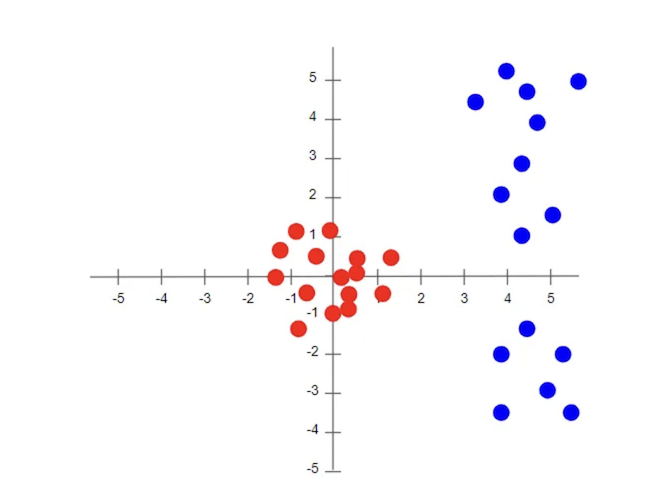

Синие точки здесь иллюстрируют элементы датасета до нормализации, красным — после.

### BatchNorm

Сейчас мы поговорим о новом слое сети — батч-нормализации. **Это слой, который помогает сделать обучение сети более стабильным и более быстрым.** Кроме того, часто нейросеть со слоями batchnorm может обучиться под задачу лучше, чем та же сеть без batchnorm.





Посмотрим на нейросеть, у которой несколько слоев. Заметим, что 2-3 слои этой нейросети можно рассматривать как отдельную, меньшую нейросеть. Входные данные в эту нейросеть — выходы первого слоя сети.

Мы уже знаем, что для лучшего обучения нейросетей входные данные нужно нормализовать. Получается, нормализация выходов каждого промежуточно слоя тоже способствует лучшему обучению сети. BatchNorm — это и есть слой, который выполняет такую нормализацию.

network.svg



Но есть еще вторая причина нормализовать выходы промежуточных слоев. Это эффект internal covariate shift в нейросетях. Изначально BatchNorm задумывался как способ избавиться отэтого эффекта.

**Что такое internal covariate shift**: посмотрим на нейросеть, у которой несколько слоев. Во время обучения все слои обучаются совместно. И каждый слой сети во время обучения должен подстроиться под те значения, которые выдает предыдущий слой. Однако во время обучения сети распределения значений, которые выдает каждый слой сети, меняются. И каждому скрытому слою на каждой итерации алгоритма приходится подстраиваться под новое распределение выходов предыдущего слоя. Из-за этого сеть обучается медленнее. При этом на каждой итерации обучения веса могут меняться довольно сильно, что может провоцировать другие проблемы, например, взрыв градиентов.

Нормализация выходов слоев нейросети помогла бы решить эту проблему.

Итак, как можно реализовать нормализацию выходов слоев? Самая простая идея — строго нормализовать выход каждого слоя перед подачей в сеть дальше, как мы нормализуем входные данные. Скажем, так же приводить средние значения всех выходов слоев к 0, а дисперсии к 1.

Но почему бы не дать нейросети больше свободы и не позволить ей самой определять, как именно лучше всего нормализовать выходы каждого слоя?
Именно в этом и есть идея BatchNorm. **BatchNorm — это обучаемый слой, который нормализует выходы сети с помощью обучаемых параметров**.

Слой BatchNorm применяется после слоя сети и работает следующим образом:

1. Считаем среднее $\mu_B$ и дисперсию $\sigma_B$ выходов сети слоя по батчу. То есть, у нас есть $b$ выходов слоя $\{x_i\}_{i=1}^b$, где $b$ — размер батча. Тогда:

$$\mu_B = \frac{\sum_{i=1}^b x_i}{b}$$
$$\sigma^2_B = \frac{\sum_{i=1}^b (x_i - \mu_B)^2}{b}$$

2. Нормализуем выходы слоя:
$$\widehat{x_i} = \frac{x_i - \mu_B}{\sigma_B}$$

3. Вычисляем обновленные выходы слоя как

$$y_i = \gamma\widehat{x_i} + \beta$$

, где $\gamma$ и $\beta$ — обучаемые параметры.


То есть, идея такая: мы нормализуем выход каждого нейрона так, чтобы среднее значение его выхода стало 0, дисперсия 1. И затем мы умножаем выход каждого нейрона на обучаемое значение $\gamma$ и прибавляем обучаемое значение $\beta$. То есть, мы изменяем среднее значение выхода нейрона и его дисперсию. Но при этом делаем так, что для всех нейронов слоя среднее значение выхода и дисперсия были одинаковы.

Обучаемые среднее и дисперсия для каждого слоя позволяют нейросети выбирать наиболее удобную нормализацию значений слоев для конкретной задачи.

На практике BatchNorm применяется практически во всех нейросетях, особенно в глубоких. Мы еще это увидим, когда будем говорить о популярных архитектурах сетей.

## Практика

В этой части мы будем решать задачу классификации изображений на 10 классов с помощью полносвязной нейросети на PyTorch.

In [2]:
import sys; print(sys.executable)

c:\Users\n.tulupov\AppData\Local\Programs\Python\Python313\python.exe


In [3]:
import torch, torchvision, sys


In [4]:
import torch, torchvision
from torchvision import datasets, transforms
from torchvision.ops import nms
print("OK:", torch.__version__, torchvision.__version__)

OK: 2.8.0+cpu 0.23.0+cpu


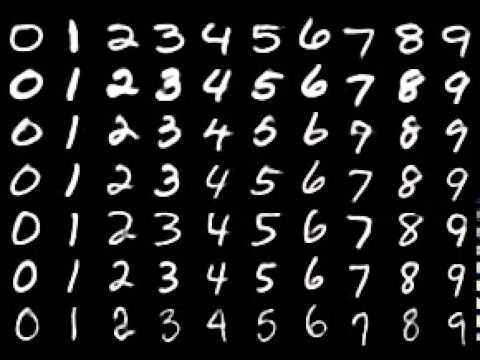

In [5]:
import torch, torchvision
print("torch:", torch.__version__)
print("torchvision:", torchvision.__version__)

torch: 2.8.0+cpu
torchvision: 0.23.0+cpu


In [6]:
import numpy as np
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
%matplotlib inline

# модули библиотеки PyTorch
import torch
from torchvision import datasets, transforms

### Загрузка датасета

Датасет MNIST — один из стандартных, и он лежит в модуле datasets фреймворка PyTorch. Скачать и загрузить в память его очень просто:

In [7]:
train_data = datasets.MNIST(root="./mnist_data", train=True, download=True, transform=transforms.ToTensor())
test_data = datasets.MNIST(root="./mnist_data", train=False, download=True, transform=transforms.ToTensor())

100%|██████████| 9.91M/9.91M [00:11<00:00, 854kB/s] 
100%|██████████| 28.9k/28.9k [00:00<00:00, 328kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 1.30MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 3.27MB/s]


Здесь:
- root — путь к папке, куда будет скачан датасет;
- train — если True, то будет скачана тренировочная чать выборки, если False — то тестовая;
- download — True, если датасета еще нет на диске. Если он уже скачан, то можно поставить download=False;
- transform — какие преобразования применить к элементами датасета при загрузке;
- transforms.ToTensor() переводит все картинки в тип "тензор".

In [8]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./mnist_data
    Split: Train
    StandardTransform
Transform: ToTensor()

Далее к обоим частям датасета нужно завести даталоадер. Даталоадер — это структура, которая координирует разбиение датасета на батчи. Мы будем ее использовать в коде обучения сети.

In [9]:
train_loader = torch.utils.data.DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=64, shuffle=False)

Здесь:
- batch_size — размер батча;
- shuffle — True, если нужно перед каждой эпохой перемешивать датасет перед делением на батчи, и False — если нет. Для обучающей выборки всегда должно быть shuffle=True!


### Построение сети

Мы собираемся построить полносвязную нейросеть для решения задачи классификации картинок на 10 классов. Чтобы это сделать, нужно понять, каким образом подавать картинки на вход нейросети.

На самом деле, сделать это довольно просто. Каждая черно-белая картинка — это двумерная матрица чисел. В нашем датасете картинки имеют разрешение 28х28, поэтому каждая картинка из MNIST представляется матрицей чисел размера 28х28.

Чтобы подать картинку на вход нейросети, мы растянем двумерную матрицу в одномерный вектор. Просто сконкатенируем все строки матрицы в один длинный вектор размера 28*28 = 784. Получается, каждая картинка будет представлена вектором размера 784. Этот вектор можно рассматривать как вектор признаков картинки.


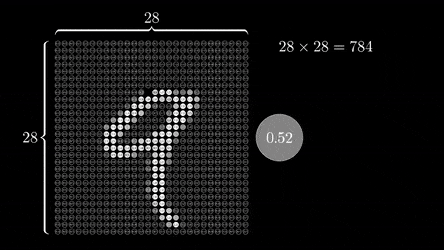

Тогда в нейросети, которая будет решать задачу классификации картинок MNIST, во входном слое должно быть ровно 784 нейрона. А в выходном — 10, так как в нашей задаче 10 классов. Количество же промежуточных слоев и нейронов в каждом из промежуточных слоев может быть любым.

Давайте же построим нейросеть:

In [27]:
# модуль, где определены слои для нейронных сетей
import torch.nn as nn
# модуль, где определены активации для слоев нейронных сетей
import torch.nn.functional as F

from tqdm.auto import tqdm

c:\Users\n.tulupov\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [20]:
class SimpleNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = torch.nn.Flatten()
        self.fc_in = nn.Linear(28*28, 256)
        self.fc_out = nn.Linear(256, 10)

    def forward(self, x):
        # forward pass сети

        # переводим входной объект из картинки в вектор
        x = self.flatten(x)
        # умножение на матрицу весов 1 слоя и применение функции активации
        x = F.relu(self.fc_in(x))
        # умножение на матрицу весов 2 слоя и применение функции активации
        x = self.fc_out(x)
        return x

In [21]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [22]:
device

device(type='cpu')

In [23]:
model = SimpleNet().to(device)

### Обучение нейросети

Объявим функцию потерь и оптимизатор:

In [24]:
# функция потерь
loss_fn = torch.nn.CrossEntropyLoss()

# оптимизатор
learning_rate = 1e-3
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

И, наконец, напишем функцию обучения модели:

In [ ]:
def train(model, loss_fn, optimizer, n_epoch=6):

    model.train(True)

    # цикл обучения сети
    for epoch in tqdm(range(n_epoch)):

        for i, batch in enumerate(tqdm(train_loader)):

            # так получаем текущий батч картинок и ответов к ним
            X_batch, y_batch = batch

            # forward pass (получение ответов сети на батч картинок)
            logits = model(X_batch.to(device))

            # вычисление лосса от выданных сетью ответов и правильных ответов на батч
            loss = loss_fn(logits, y_batch.to(device))

            # каждые 50 итераций будем выводить лосс на текущем батче
            #if i % 50 == 0:
            #    print(loss.item())

            optimizer.zero_grad() # обнуляем значения градиентов оптимизаторв
            loss.backward() # backpropagation (вычисление градиентов)
            optimizer.step() # обновление весов сети


    return model

Обучим модель:

In [28]:
model = train(model, loss_fn, optimizer, n_epoch=2)

  0%|          | 0/2 [00:00<?, ?it/s]


2.2956132888793945


0.5383186340332031


0.33906129002571106


0.4740303158760071


0.3014555871486664


0.20707282423973083


0.20354413986206055


0.4108787477016449


0.2763127386569977


0.17168784141540527


0.1798250377178192


0.1514790952205658


0.17028941214084625


0.19516567885875702


0.1535957157611847


0.18220466375350952


0.30258819460868835


0.19243361055850983


0.132166787981987







 50%|█████     | 1/2 [00:15<00:15, 15.97s/it]



0.14051464200019836


0.0758601725101471


0.2318493276834488


0.19335240125656128


0.11248636245727539


0.12021065503358841


0.11014289408922195


0.1475660651922226


0.14345146715641022


0.09288051724433899


0.049193594604730606


0.3241235613822937


0.21101166307926178


0.038254402577877045


0.059133272618055344


0.096564382314682


0.05703107267618179


0.21407762169837952


0.07772376388311386




100%|██████████| 2/2 [00:33<00:00, 16.83s/it]


Отлично, модель обучилась. Давайте протестируем ее качество на тестовой выборке. Для этого напишем функцию evaluate:

In [29]:
from sklearn.metrics import accuracy_score

def evaluate(model, dataloader, loss_fn):

    y_pred_list = []
    y_true_list = []
    losses = []

    # проходимся по батчам даталоадера
    for i, batch in enumerate(tqdm(dataloader)):

        # так получаем текущий батч
        X_batch, y_batch = batch

        # выключаем подсчет любых градиентов
        with torch.no_grad():

            # получаем ответы сети на батч
            logits = model(X_batch.to(device))

            # вычисляем значение лосс-функции на батче
            loss = loss_fn(logits, y_batch.to(device))
            loss = loss.item()

            # сохраняем лосс на текущем батче в массив
            losses.append(loss)

            # для каждого элемента батча понимаем,
            # к какому классу от 0 до 9 отнесла его сеть
            y_pred = torch.argmax(logits, dim=1)

        # сохраняем в массивы правильные ответы на текущий батч
        # и ответы сети на текущий батч
        y_pred_list.extend(y_pred.cpu().numpy())
        y_true_list.extend(y_batch.numpy())

    # считаем accuracy между ответам сети и правильными ответами
    accuracy = accuracy_score(y_pred_list, y_true_list)

    return accuracy, np.mean(losses)

Проверим качество предсказаний модели на тренировочной и тестовой выборках:

In [30]:
evaluate(model, train_loader, loss_fn)

100%|██████████| 938/938 [00:05<00:00, 163.37it/s]


(0.9743333333333334, np.float64(0.08947326889686556))

In [31]:
evaluate(model, test_loader, loss_fn)

100%|██████████| 157/157 [00:00<00:00, 182.27it/s]


(0.9682, np.float64(0.10431061527442638))

### Валидационная выборка

Для того, чтобы в процессе обучения сети отслеживать ее текущее качество, обычно тренировочную выборку делят еще на две части: на тренировочную и валидационную. Тренировочная часть служит для обучения сети, валидационная — для проверки качества сети после каждых n итераций обучения (например, после каждой эпохи).

Текстовую выборку в качестве валидационной использовать нельзя. Так есть риск переобучиться под тестовую выборку.

Поделим наши тренировочные данные на train и val:

In [ ]:
# в тренировочную выборку отнесем 80% всех картинок
train_size = int(len(train_data) * 0.8)
# в валидационную — остальные 20%
val_size = len(train_data) - train_size

train_data, val_data = torch.utils.data.random_split(train_data, [train_size, val_size])

In [ ]:
train_data, val_data, test_data

Объявим даталоадеры для обновленных датасетов:

In [ ]:
train_loader = torch.utils.data.DataLoader(train_data, batch_size=64, shuffle=True)
val_loader = torch.utils.data.DataLoader(train_data, batch_size=64, shuffle=False)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=64, shuffle=False)

И немного допишем код обучения сети: вставим проверку лосса и accuracy на train и val выборке после каждой эпохи:

In [ ]:
def train(model, loss_fn, optimizer, n_epoch=6):

    model.train(True)

    data = {
        'acc_train': [],
        'loss_train': [],
        'acc_val': [],
        'loss_val': []
    }

    # цикл обучения сети
    for epoch in tqdm(range(n_epoch)):

        for i, batch in enumerate(tqdm(train_loader)):

            # так получаем текущий батч картинок и ответов к ним
            X_batch, y_batch = batch

            # forward pass (получение ответов сети на батч картинок)
            logits = model(X_batch.to(device))

            # вычисление лосса от выданных сетью ответов и правильных ответов на батч
            loss = loss_fn(logits, y_batch.to(device))

            optimizer.zero_grad() # обнуляем значения градиентов оптимизаторв
            loss.backward() # backpropagation (вычисление градиентов)
            optimizer.step() # обновление весов сети

        # конец эпохи, валидируем модель
        print('On epoch end', epoch)

        acc_train_epoch, loss_train_epoch = evaluate(model, train_loader, loss_fn)
        print('Train acc:', acc_train_epoch, 'Train loss:', loss_train_epoch)

        acc_val_epoch, loss_val_epoch = evaluate(model, val_loader, loss_fn)
        print('Val acc:', acc_val_epoch, 'Val loss:', loss_val_epoch)


        data['acc_train'].append(acc_train_epoch)
        data['loss_train'].append(loss_train_epoch)
        data['acc_val'].append(acc_val_epoch)
        data['loss_val'].append(loss_val_epoch)

    return model, data

Снова создадим модель со случайными весами, объявим для нее лосс-функцию и оптимизатор:

In [ ]:
model = SimpleNet().to(device)

# функция потерь
loss_fn = torch.nn.CrossEntropyLoss()

# оптимизатор
learning_rate = 1e-3
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

Обучим модель:

In [ ]:
model, data = train(model, loss_fn, optimizer, n_epoch=3)

Визуализируем графики изменения лоссов и accuracy с течением эпох:

In [ ]:
_, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

ox = list(range(3))

axes[0][0].plot(ox, data['acc_train'])
axes[0][0].title.set_text('acc_train')

axes[0][1].plot(ox, data['acc_val'])
axes[0][1].title.set_text('acc_val')

axes[1][0].plot(ox, data['loss_train'])
axes[1][0].title.set_text('loss_train')

axes[1][1].plot(ox, data['loss_val'])
axes[1][1].title.set_text('loss_val')

plt.show()